# Importing Liberies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.colors as mcolors

# Data Import

In [4]:
data_stations = pd.read_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_stations.csv', delimiter=",")

In [5]:
display(data_stations)

,Data_Hora,Latitude,Longitude,Precipitacao,Radiacao_Solar,Temperatura,Umidade
0,2021-01-01 10:00:00,-15.789444,-47.925833,0.0,298.2,20.2,83.0
1,2021-01-01 11:00:00,-15.789444,-47.925833,0.0,1203.7,23.2,69.0
2,2021-01-01 12:00:00,-15.789444,-47.925833,0.0,1664.9,24.9,65.0
3,2021-01-01 13:00:00,-15.789444,-47.925833,0.0,2851.7,25.9,52.0
4,2021-01-01 14:00:00,-15.789444,-47.925833,0.0,3115.7,27.0,50.0
...,...,...,...,...,...,...,...
4983028,2023-12-31 19:00:00,-27.388611,-51.215833,0.0,2834.4,26.0,40.0
4983029,2023-12-31 20:00:00,-27.388611,-51.215833,0.0,1088.7,24.6,47.0
4983030,2023-12-31 21:00:00,-27.388611,-51.215833,0.0,789.9,23.9,50.0
4983031,2023-12-31 22:00:00,-27.388611,-51.215833,0.0,397.9,22.9,55.0


In [6]:
data_burned = pd.read_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_burned.csv', delimiter=",")

In [7]:
display(data_burned)

,Data_Hora,Latitude,Longitude,DiaSemChuva,Precipitacao,RiscoFogo,FRP
0,2021-12-05 16:54:00,-3.05079,-49.48395,0.0,7.3,0.00,14.4
1,2021-12-05 16:49:00,-24.85887,-48.50217,8.0,8.7,0.20,9.0
2,2021-12-05 16:54:00,-1.39502,-52.67188,1.0,11.0,0.00,30.7
3,2021-12-05 16:54:00,-3.07819,-40.74868,1.0,0.3,0.70,46.8
4,2021-12-05 16:54:00,-3.06516,-52.92874,1.0,1.5,0.00,9.3
...,...,...,...,...,...,...,...
574740,2023-07-27 18:02:00,-6.93483,-59.52313,12.0,0.0,0.46,82.0
574741,2023-07-27 18:02:00,-6.93405,-59.56060,12.0,0.0,0.45,160.6
574742,2023-07-27 18:02:00,-6.93259,-59.55067,12.0,0.0,0.46,40.4
574743,2023-07-27 18:02:00,-6.93112,-59.54064,12.0,0.0,0.46,751.6


In [8]:
data_stations['Data_Hora'] = pd.to_datetime(data_stations['Data_Hora'])
data_burned['Data_Hora'] = pd.to_datetime(data_burned['Data_Hora'])

# Data Manipulation

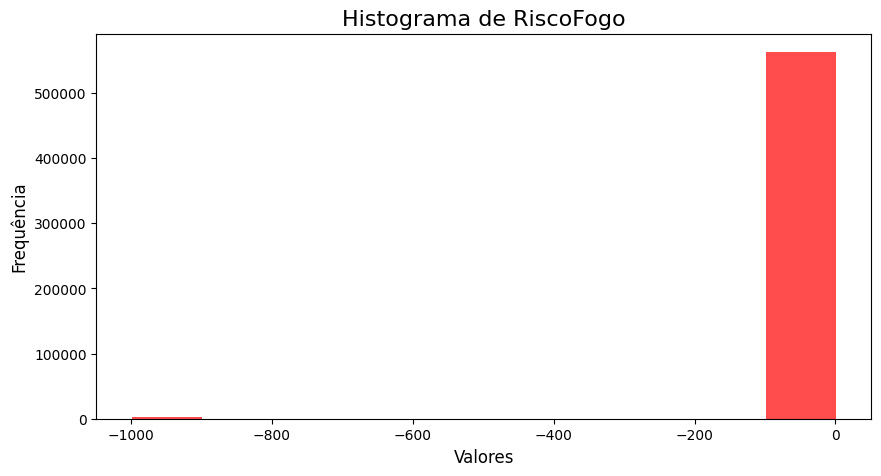

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(data_burned['RiscoFogo'], bins=10, color='red', alpha=0.7)

plt.title('Histograma de RiscoFogo', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [10]:
data_burned_manip = data_burned.copy()

In [11]:
data_burned_manip['Data_Hora'] = data_burned_manip['Data_Hora'].dt.round('h')

In [12]:
data_burned_manip = data_burned_manip[data_burned_manip['RiscoFogo']>=0]

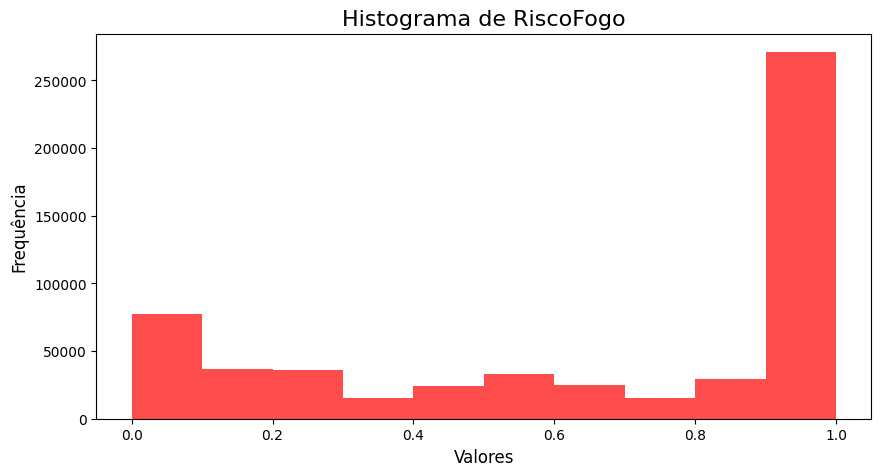

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(data_burned_manip['RiscoFogo'], bins=10, color='red', alpha=0.7)

plt.title('Histograma de RiscoFogo', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

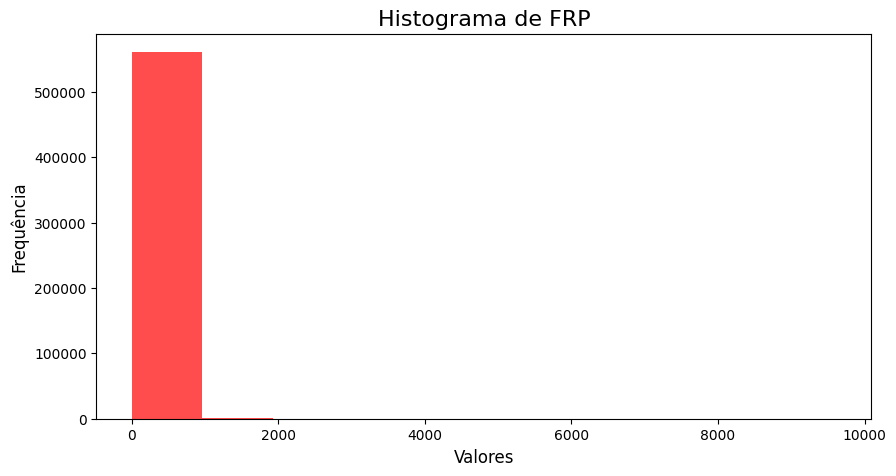

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(data_burned_manip['FRP'], bins=10, color='red', alpha=0.7)

plt.title('Histograma de FRP', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [15]:
data_burned_manip = data_burned_manip[data_burned_manip['FRP']>50]

In [16]:
data_burned_manip = data_burned_manip[data_burned_manip['FRP']<100]

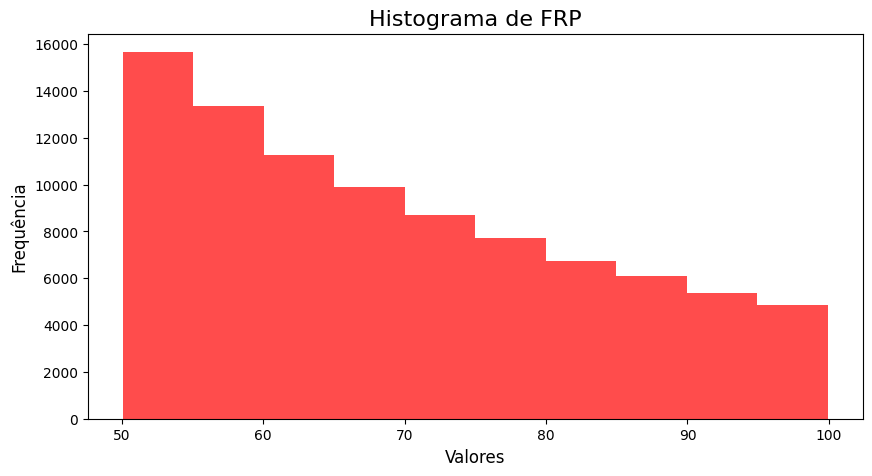

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data_burned_manip['FRP'], bins=10, color='red', alpha=0.7)

plt.title('Histograma de FRP', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [19]:
def is_within_range(lat_A, lon_A, lat_B, lon_B, range_value=2.5):
    return (
        (lat_B >= lat_A - range_value) & (lat_B <= lat_A + range_value) &
        (lon_B >= lon_A - range_value) & (lon_B <= lon_A + range_value)
    )


In [23]:
merged_data = []

for id, row_A in data_burned_manip.iterrows():

    print(id)

    filtered_B = data_stations[
        (data_stations['Data_Hora'] == row_A['Data_Hora']) &
        is_within_range(row_A['Latitude'], row_A['Longitude'], data_stations['Latitude'], data_stations['Longitude'])
    ]
    
    if not filtered_B.empty:
        mean_values = filtered_B[['Precipitacao', 'Radiacao_Solar', 'Temperatura', 'Umidade']].mean()
        
        merged_data.append({
            'Data_Hora': row_A['Data_Hora'],
            'Latitude': row_A['Latitude'],
            'Longitude': row_A['Longitude'],
            'DiaSemChuva': row_A['DiaSemChuva'],
            'RiscoFogo': row_A['RiscoFogo'],
            'FRP': row_A['FRP'],
            'Precipitacao_Mean': mean_values['Precipitacao'],
            'Radiacao_Solar_Mean': mean_values['Radiacao_Solar'],
            'Temperatura_Mean': mean_values['Temperatura'],
            'Umidade_Mean': mean_values['Umidade']
        })

df_merged = pd.DataFrame(merged_data)

5
17
20
26
39
51
64
66
73
90
92
99
120
125
137
139
141
148
151
154
167
176
192
205
211
213
224
231
243
248
252
267
269
282
286
307
308
317
320
321
324
333
337
346
348
354
356
381
383
392
396
404
433
451
453
454
475
478
479
523
527
541
543
560
562
568
583
592
600
604
614
635
642
643
647
664
672
676
691
699
738
758
793
824
826
864
882
884
937
941
948
951
959
981
996
1008
1016
1023
1027
1028
1029
1030
1031
1032
1034
1040
1041
1044
1071
1072
1093
1115
1132
1139
1165
1200
1204
1206
1217
1221
1227
1246
1262
1267
1270
1273
1283
1286
1288
1302
1304
1307
1309
1313
1315
1316
1349
1362
1388
1390
1392
1395
1399
1401
1403
1404
1409
1410
1414
1415
1420
1421
1423
1426
1431
1432
1433
1437
1442
1444
1453
1466
1506
1508
1509
1547
1583
1599
1650
1662
1663
1666
1675
1679
1689
1695
1697
1721
1731
1753
1758
1760
1792
1797
1798
1802
1822
1827
1863
1898
1899
1914
1929
1944
1947
1951
1975
1980
1994
2068
2071
2072
2078
2083
2084
2087
2088
2089
2094
2095
2103
2108
2111
2114
2130
2132
2139
2150
2156
2160
2163
216

In [25]:
(df_merged).to_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_merged_burned_mean_climate_conditions.csv', index=False)

In [24]:
display(df_merged)

,Data_Hora,Latitude,Longitude,DiaSemChuva,RiscoFogo,FRP,Precipitacao_Mean,Radiacao_Solar_Mean,Temperatura_Mean,Umidade_Mean
0,2021-12-05 17:00:00,-3.11220,-39.80265,1.0,1.00,59.7,0.0,2221.066667,34.833333,37.666667
1,2021-12-05 17:00:00,-3.84254,-38.80573,30.0,1.00,75.5,0.0,2120.633333,35.133333,35.333333
2,2021-12-05 17:00:00,-3.85409,-39.63329,0.0,1.00,91.9,0.0,2221.066667,34.833333,37.666667
3,2021-12-05 17:00:00,-5.66431,-39.76230,3.0,1.00,65.2,0.0,2553.587500,34.275000,36.750000
4,2021-12-05 17:00:00,-2.90067,-40.57811,-999.0,0.80,57.7,0.0,2088.750000,34.450000,40.000000
...,...,...,...,...,...,...,...,...,...,...
79490,2023-07-27 18:00:00,-7.07196,-59.50691,13.0,0.49,90.7,0.0,2224.500000,35.233333,36.333333
79491,2023-07-27 18:00:00,-7.06257,-59.50840,13.0,0.51,72.3,0.0,2074.800000,35.200000,41.000000
79492,2023-07-27 18:00:00,-7.00804,-59.56313,12.0,0.46,72.0,0.0,2074.800000,35.200000,41.000000
79493,2023-07-27 18:00:00,-6.94237,-59.57305,11.0,0.45,72.9,0.0,2074.800000,35.200000,41.000000


# Plot Functions

In [21]:
def bar_plot_media_mensal_por_ano(df, variavel, cor):

    df['Year'] = df['Data_Hora'].dt.year
    df['Month'] = df['Data_Hora'].dt.strftime('%b')

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    grouped_df = df.groupby([df['Year'], df['Month']])[variavel].mean().reset_index(name='Mean')
    grouped_df['Month'] = pd.Categorical(grouped_df['Month'], categories=month_order, ordered=True)
    grouped_df = grouped_df.sort_values(['Year', 'Month'])

    fig, axes = plt.subplots(1, 3, figsize=(15, 2.5), sharey=True)

    for i, year in enumerate(grouped_df['Year'].unique()):
        yearly_data = grouped_df[grouped_df['Year'] == year]
        axes[i].bar(yearly_data['Month'], yearly_data['Mean'], color=cor)
        axes[i].set_title(f'Ano: {year}')
        axes[i].set_xlabel('Mês')
        axes[i].set_xticks(range(len(month_order)))
        axes[i].set_xticklabels(month_order, rotation=0)

    fig.supylabel(f'Média de {variavel}')

    plt.tight_layout()

    plt.show()

#### Mean Variable per Month on each Year Plot

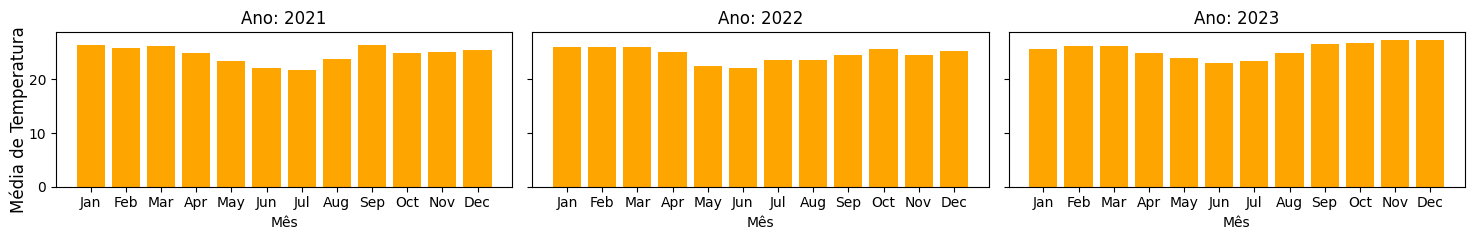

In [22]:
bar_plot_media_mensal_por_ano(data_stations, 'Temperatura', 'orange')

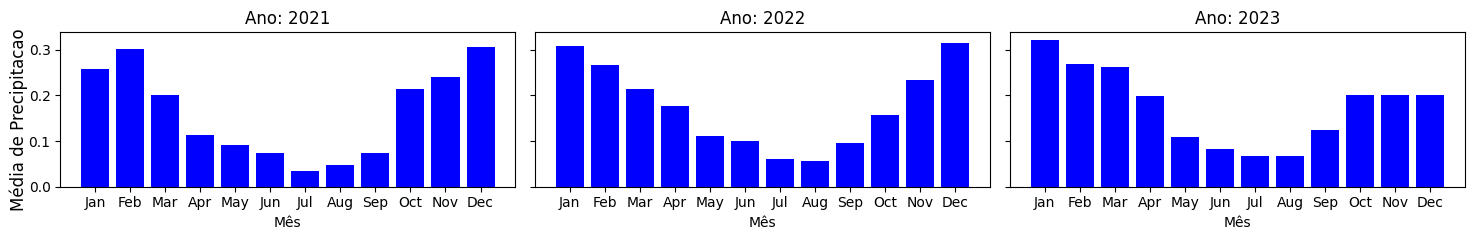

In [23]:
bar_plot_media_mensal_por_ano(data_stations, 'Precipitacao', 'blue')

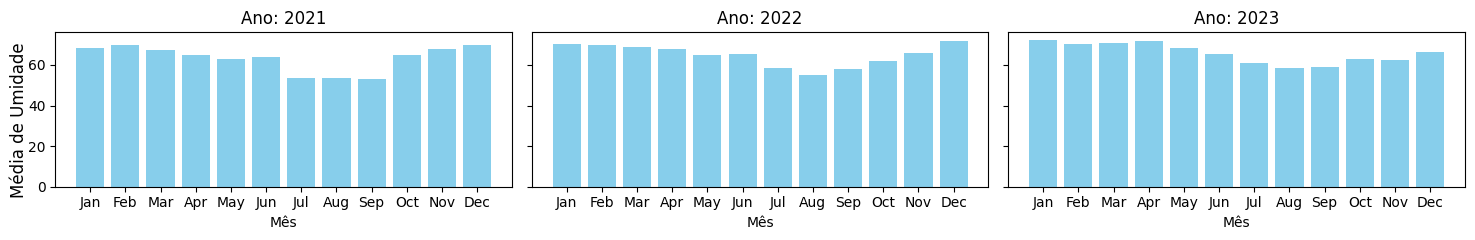

In [24]:
bar_plot_media_mensal_por_ano(data_stations, 'Umidade', 'skyblue')

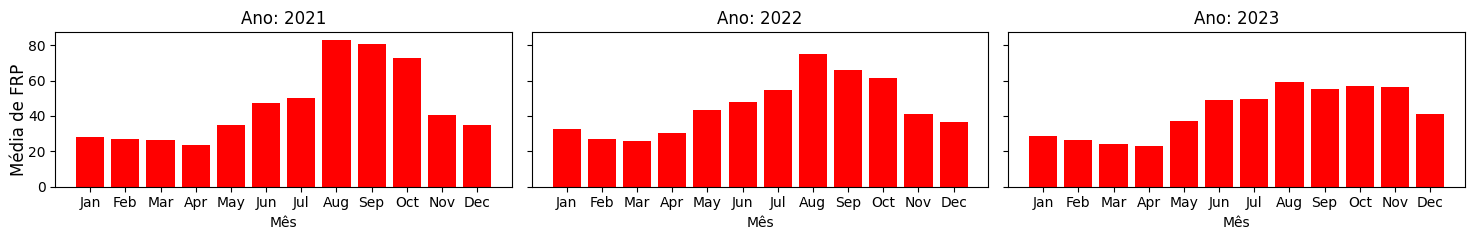

In [25]:
bar_plot_media_mensal_por_ano(data_burned, 'FRP', 'red')

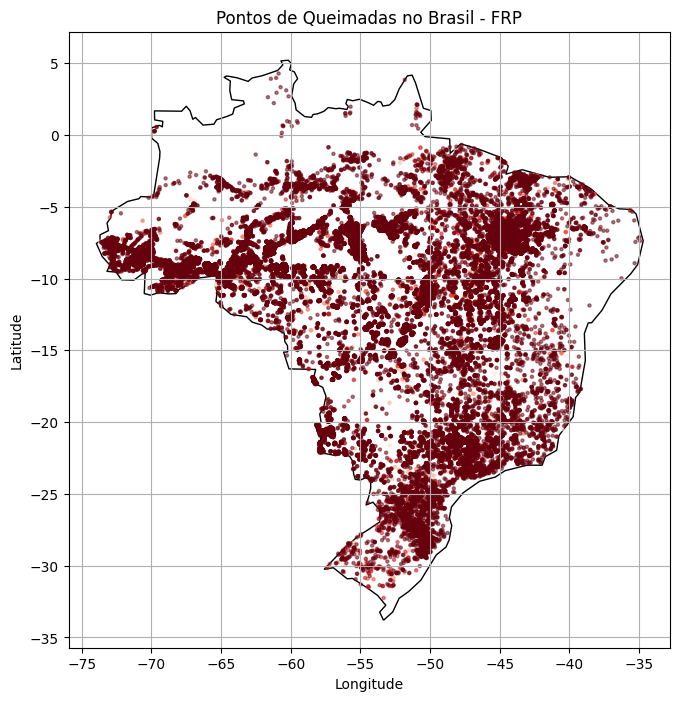

In [60]:
df_data_burned_plot = data_burned[data_burned['Data_Hora'].dt.year == 2021]
df_data_burned_plot = df_data_burned_plot[df_data_burned_plot['Data_Hora'].dt.month == 8]

brazil = gpd.read_file(r"data\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")
brazil = brazil[brazil['NAME'] == 'Brazil']

geometry = [Point(xy) for xy in zip(df_data_burned_plot['Longitude'], df_data_burned_plot['Latitude'])]
geo_df = gpd.GeoDataFrame(df_data_burned_plot, geometry=geometry, crs="EPSG:4326")

plt.figure(figsize=(8, 8))

brazil.plot(ax=plt.gca(), color='white', edgecolor='black')

norm = mcolors.Normalize(vmin=geo_df['FRP'].min(), vmax=geo_df['FRP'].max())

geo_df.plot(
    ax=plt.gca(), 
    marker='o', 
    c=geo_df['FRP'], 
    cmap='Reds',
    markersize=5,
    norm=norm, 
    alpha=0.5
)

plt.title('Pontos de Queimadas no Brasil - FRP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)

plt.show()
